In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google_drive_downloader import GoogleDriveDownloader as gdd
import seaborn as sb
import sklearn

plt.style.use("dark_background")

In [2]:
data = pd.read_csv("./Datasets/Frappe/frappe.csv")
metadata = pd.read_csv("./Datasets/Frappe/frappe_meta.csv", sep="\t")

In [3]:
data.head()

,user,item,daytime,weekday,isweekend,homework,cost,weather,country,city,cnt
0,0,0,morning,sunday,weekend,unknown,free,sunny,United States,0,1
1,0,9,afternoon,friday,workday,unknown,free,cloudy,United States,1023,2
2,0,9,evening,friday,weekend,unknown,free,cloudy,United States,1023,9
3,0,14,afternoon,friday,workday,unknown,free,cloudy,United States,1023,2
4,0,16,evening,friday,weekend,unknown,free,cloudy,United States,1023,1


하위 10%: 3
상위 10%: 52


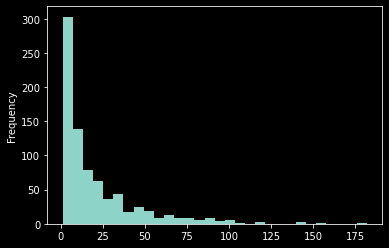

In [75]:
# 유저별로 1번 이상 사용한 앱의 수
user_n_items = data[["user", "item"]].drop_duplicates()["user"].value_counts().sort_values(ascending=False)
user_n_items.plot.hist(bins=30);
print(f"하위 10%: {user_n_items.quantile(0.1):.0f}")
print(f"상위 10%: {user_n_items.quantile(0.9):.0f}")

하위 10%: 14
상위 10%: 33195


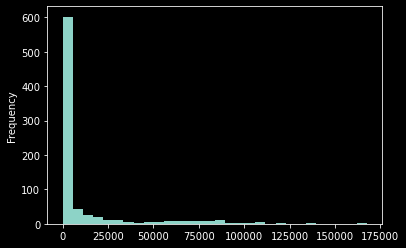

In [76]:
# 유저별 앱 사용량의 합
user_cnt = data.groupby(["user"])["cnt"].sum().sort_values(ascending=False)
user_cnt.plot.hist(bins=30);
print(f"하위 10%: {user_cnt.quantile(0.1):.0f}")
print(f"상위 10%: {user_cnt.quantile(0.9):.0f}")

하위 10%: 9
상위 10%: 4432


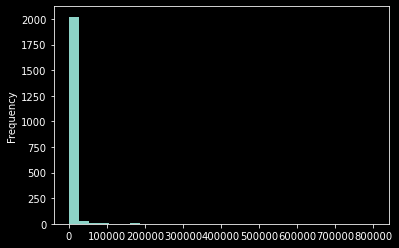

In [84]:
# 아이템별 앱 사용량의 합
item_cnt = data.groupby(["item"])["cnt"].sum().sort_values(ascending=False)
item_cnt.plot.hist(bins=30);
print(f"하위 10%: {item_cnt.quantile(0.1):.0f}")
print(f"상위 10%: {item_cnt.quantile(0.9):.0f}")

In [127]:
# 사용량 상위 10개 앱
temp1 = item_cnt.iloc[:10]
temp2 = metadata[metadata["item"].isin(temp1.index)]
pd.concat([temp1, temp2], axis=1)[["name", "cnt"]]

,name,cnt
5,WhatsApp Messenger,800549
9,Maps,168913
11,Twitter,176887
16,Facebook,540193
17,Google Search,180685
21,Gmail,331651
25,Chrome,532192
33,Nova Launcher,180020
40,Candy Crush Saga,158953
65,YouTube,172661


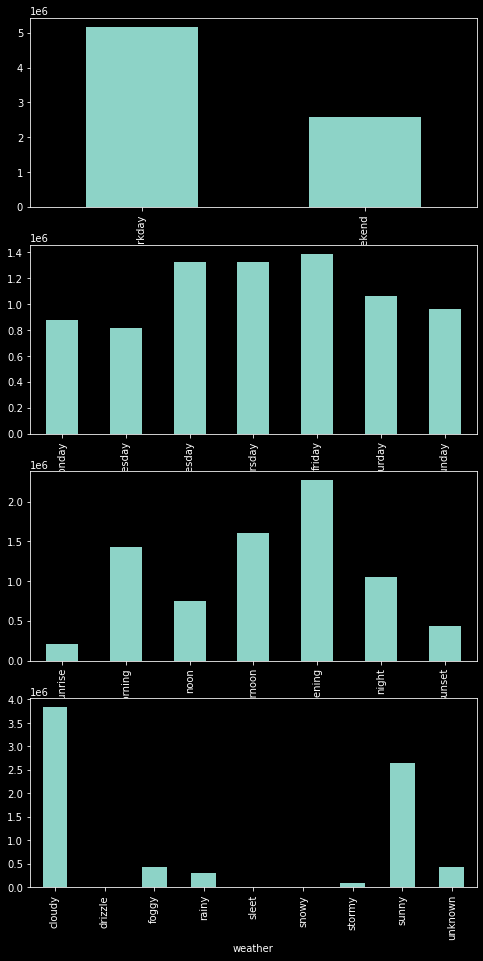

In [186]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16))
data.groupby(["isweekend"])["cnt"].sum()[["workday", "weekend"]].plot.bar(ax=axes[0]);
data.groupby(["weekday"])["cnt"].sum()[["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]].plot.bar(ax=axes[1]);
data.groupby(["daytime"])["cnt"].sum()[["sunrise", "morning", "noon", "afternoon", "evening", "night", "sunset"]].plot.bar(ax=axes[2]);
data.groupby(["weather"])["cnt"].sum().plot.bar(ax=axes[3]);

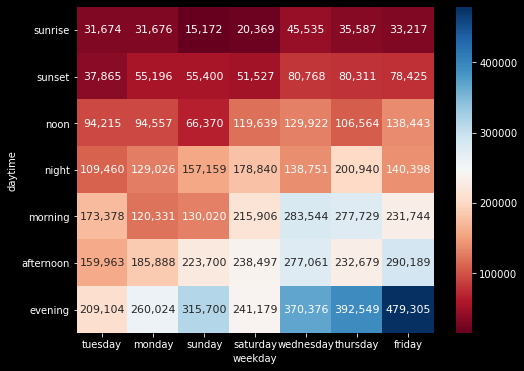

In [181]:
pivot = pd.pivot_table(data[["daytime", "weekday", "cnt"]], index="daytime", columns="weekday", values="cnt", aggfunc=sum)
col_ord = pivot.sum(axis=0).sort_values().index
row_ord = pivot.sum(axis=1).sort_values().index
pivot = pivot.loc[row_ord, col_ord]

fig, axes = plt.subplots(figsize=(8, 6));
sb.heatmap(data=pivot, annot=True, annot_kws={"size": 11}, fmt=",", cmap="RdBu");

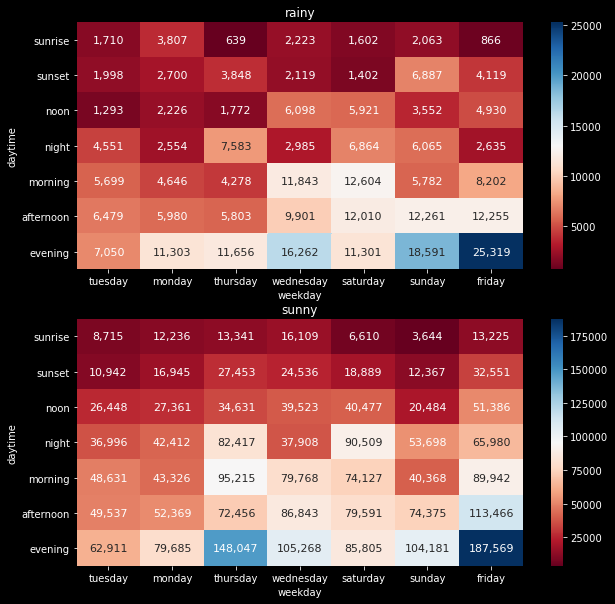

In [199]:
pivot1 = pd.pivot_table(data.loc[data["weather"]=="rainy", ["daytime", "weekday", "cnt"]], index="daytime", columns="weekday", values="cnt", aggfunc=np.sum)
col_ord = pivot1.sum(axis=0).sort_values().index
row_ord = pivot1.sum(axis=1).sort_values().index
pivot1 = pivot1.loc[row_ord, col_ord]

pivot2 = pd.pivot_table(data.loc[data["weather"]=="sunny", ["daytime", "weekday", "cnt"]], index="daytime", columns="weekday", values="cnt", aggfunc=np.sum)
pivot2 = pivot2.loc[row_ord, col_ord]

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sb.heatmap(ax=axes[0], data=pivot1, annot=True, annot_kws={"size":11}, fmt=",", cmap="RdBu");
axes[0].set_title("rainy");
sb.heatmap(ax=axes[1], data=pivot2, annot=True, annot_kws={"size":11}, fmt=",", cmap="RdBu");
axes[1].set_title("sunny");